In [1]:
import pandas as pd
from pandas import read_csv
from pandas.plotting import autocorrelation_plot
import numpy as np
from numpy import log
from datetime import datetime
import matplotlib.pylab as plt
plt.rcParams.update({'figure.figsize':(9,7), 'figure.dpi':120})
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

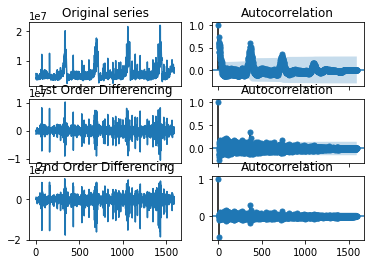

In [2]:
#import data 
df = pd.read_csv('C:/Users/UnSales.csv')
# Parse strings to datetime type
df['aodate'] = pd.to_datetime(df['aodate'], infer_datetime_format=True)
indexedDataset = df.set_index(['aodate'])

fig, axes = plt.subplots(3, 2, sharex=True)
axes[0, 0].plot(df.unscript_sales); axes[0, 0].set_title('Original series')
plot_acf(df.unscript_sales, ax=axes[0, 1])

# 1st Differencing
axes[1, 0].plot(df.unscript_sales.diff()); axes[1, 0].set_title('1st Order Differencing')
plot_acf(df.unscript_sales.diff().dropna(), ax=axes[1, 1])

# 2nd Differencing
axes[2, 0].plot(df.unscript_sales.diff().diff()); axes[2, 0].set_title('2nd Order Differencing')
plot_acf(df.unscript_sales.diff().diff().dropna(), ax=axes[2, 1])

plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\regression\linear_model.py:1283: RuntimeWarning: invalid value encountered in sqrt
  return rho, np.sqrt(sigmasq)


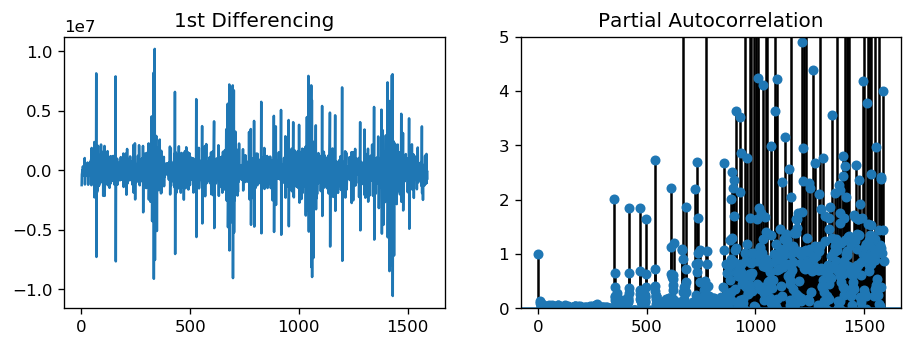

In [3]:
# PACF plot of 1st differenced series
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.unscript_sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,5))
plot_pacf(df.unscript_sales.diff().dropna(), ax=axes[1])

plt.show()

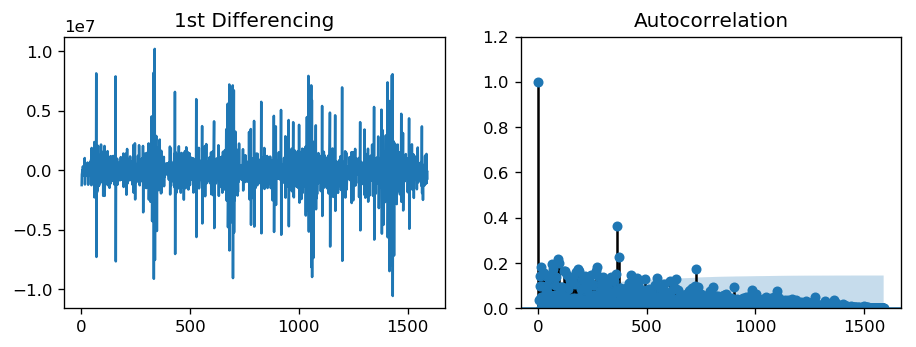

In [5]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

fig, axes = plt.subplots(1, 2, sharex=True)
axes[0].plot(df.unscript_sales.diff()); axes[0].set_title('1st Differencing')
axes[1].set(ylim=(0,1.2))
plot_acf(df.unscript_sales.diff().dropna(), ax=axes[1])

plt.show()

In [6]:
from statsmodels.tsa.arima_model import ARIMA

# 1,1,2 ARIMA Model
model = ARIMA(df.unscript_sales, order=(1,1,2))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.unscript_sales   No. Observations:                 1591
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -24887.324
Method:                       css-mle   S.D. of innovations        1503654.430
Date:                Mon, 03 Aug 2020   AIC                          49784.648
Time:                        15:51:01   BIC                          49811.509
Sample:                             1   HQIC                         49794.625
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    105.6178   9307.674      0.011      0.991   -1.81e+04    1.83e+04
ar.L1.D.unscript_sales     0.1443      0.080      1.799      0.072      -0.013       0.301
ma.L

In [7]:
# 1,1,1 ARIMA Model
model = ARIMA(df.unscript_sales, order=(1,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.unscript_sales   No. Observations:                 1591
Model:                 ARIMA(1, 1, 1)   Log Likelihood              -24892.464
Method:                       css-mle   S.D. of innovations        1508533.943
Date:                Mon, 03 Aug 2020   AIC                          49792.929
Time:                        15:51:47   BIC                          49814.417
Sample:                             1   HQIC                         49800.910
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    105.6178   9157.452      0.012      0.991   -1.78e+04    1.81e+04
ar.L1.D.unscript_sales     0.3565      0.031     11.679      0.000       0.297       0.416
ma.L

In [8]:
# 0,1,1 ARIMA Model
model = ARIMA(df.unscript_sales, order=(0,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.unscript_sales   No. Observations:                 1591
Model:                 ARIMA(0, 1, 1)   Log Likelihood              -24957.532
Method:                       css-mle   S.D. of innovations        1571531.838
Date:                Mon, 03 Aug 2020   AIC                          49921.064
Time:                        15:52:31   BIC                          49937.180
Sample:                             1   HQIC                         49927.050
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    105.6178   1.26e+04      0.008      0.993   -2.46e+04    2.48e+04
ma.L1.D.unscript_sales    -0.6801      0.027    -25.318      0.000      -0.733      -0.627
    

In [11]:
# 5,1,1 ARIMA Model
model = ARIMA(df.unscript_sales, order=(5,1,1))
model_fit = model.fit(disp=0)
print(model_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:       D.unscript_sales   No. Observations:                 1591
Model:                 ARIMA(5, 1, 1)   Log Likelihood              -24844.783
Method:                       css-mle   S.D. of innovations        1463852.688
Date:                Mon, 03 Aug 2020   AIC                          49705.566
Time:                        15:54:13   BIC                          49748.543
Sample:                             1   HQIC                         49721.530
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    105.6178   1.08e+04      0.010      0.992    -2.1e+04    2.12e+04
ar.L1.D.unscript_sales    -0.0716      0.058     -1.243      0.214      -0.184       0.041
ar.L

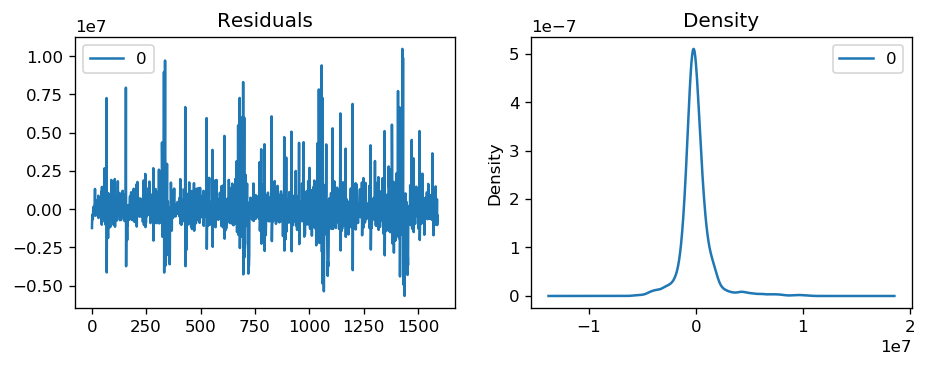

In [12]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

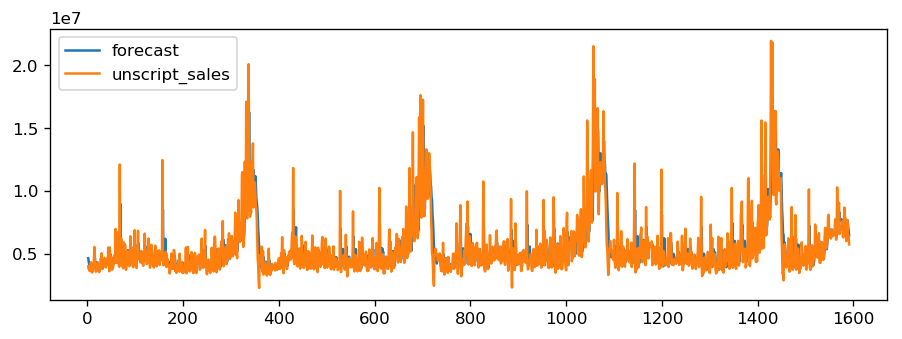

In [13]:
# Actual vs Fitted
model_fit.plot_predict(dynamic=False)
plt.show()

In [30]:
from statsmodels.tsa.stattools import acf

# Create Training and Test
train = df.unscript_sales[:1507]
test = df.unscript_sales[1507:]

In [31]:
print(train)

0       5566909.02
1       4326115.09
2       3985543.54
3       3768104.34
4       3793358.15
5       3604911.64
6       3881485.03
7       4217423.49
8       4307567.48
9       3925206.22
10      3496207.07
11      3584940.48
12      3779220.09
13      4031235.26
14      4493117.47
15      5528727.93
16      4339969.61
17      4009630.38
18      3556963.40
19      3768728.50
20      3925994.03
21      4037195.10
22      4290573.00
23      3890867.73
24      3567417.12
25      3533367.16
26      3607530.73
27      3960003.07
28      4613529.09
29      4523532.94
           ...    
1477    4865305.07
1478    4942661.23
1479    8078723.55
1480    4706273.92
1481    3721530.74
1482    3930102.74
1483    4614324.60
1484    5412584.64
1485    5257323.92
1486    4320940.14
1487    3457264.38
1488    3780027.70
1489    3783243.93
1490    3843641.33
1491    4531848.83
1492    5900885.28
1493    5305556.51
1494    4788769.37
1495    4073389.99
1496    4367598.11
1497    4877348.88
1498    4574

In [32]:
print(test)

1507    10117004.41
1508     5204564.00
1509     3854713.77
1510     3704668.49
1511     3830110.87
1512     4088352.08
1513     5638575.76
1514     5226471.90
1515     3984443.24
1516     4123735.91
1517     4536641.27
1518     5036850.78
1519     5128859.78
1520     7316907.72
1521     7051425.44
1522     5437455.78
1523     5089509.55
1524     4771161.26
1525     4684464.29
1526     4897008.62
1527     6240965.42
1528     6632123.43
1529     4312790.78
1530     4267029.49
1531     4259587.18
1532     4478384.34
1533     4751335.76
1534     5926459.28
1535     5812099.15
1536     5095230.79
           ...     
1562     7748870.83
1563     6458393.48
1564     6114942.53
1565     6584988.21
1566    10281070.36
1567     8362841.75
1568     8368071.69
1569     8839267.52
1570     9045119.63
1571     6561298.98
1572     6831999.40
1573     6975343.74
1574     6949099.76
1575     7093865.55
1576     7244014.25
1577     7584056.71
1578     6321879.01
1579     6284750.55
1580     7429480.78


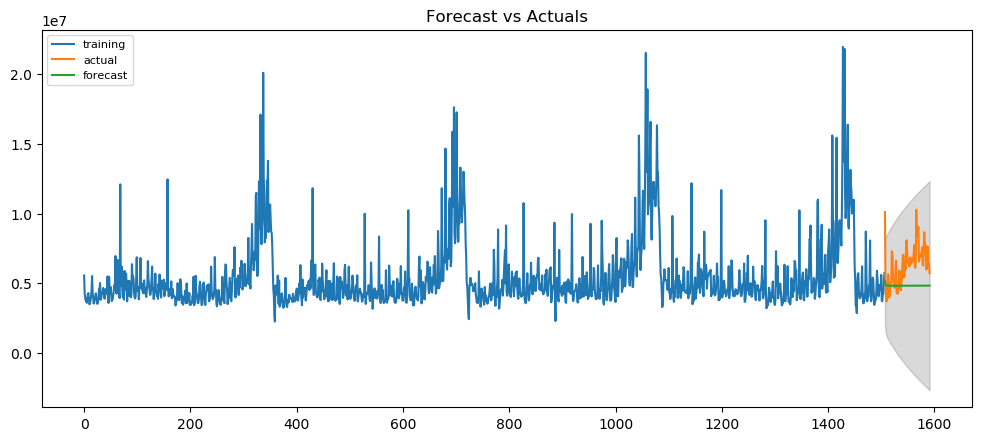

In [34]:
# Build Model
model = ARIMA(train, order=(1, 1, 1))  
fitted = model.fit(disp=-1)  

# Forecast
fc, se, conf = fitted.forecast(85, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

                             ARIMA Model Results                              
Dep. Variable:       D.unscript_sales   No. Observations:                 1506
Model:                 ARIMA(1, 1, 2)   Log Likelihood              -23579.632
Method:                       css-mle   S.D. of innovations        1525690.180
Date:                Mon, 03 Aug 2020   AIC                          47169.265
Time:                        16:08:34   BIC                          47195.851
Sample:                             1   HQIC                         47179.167
                                                                              
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                    119.4416   9768.716      0.012      0.990    -1.9e+04    1.93e+04
ar.L1.D.unscript_sales     0.1408      0.084      1.677      0.094      -0.024       0.305
ma.L

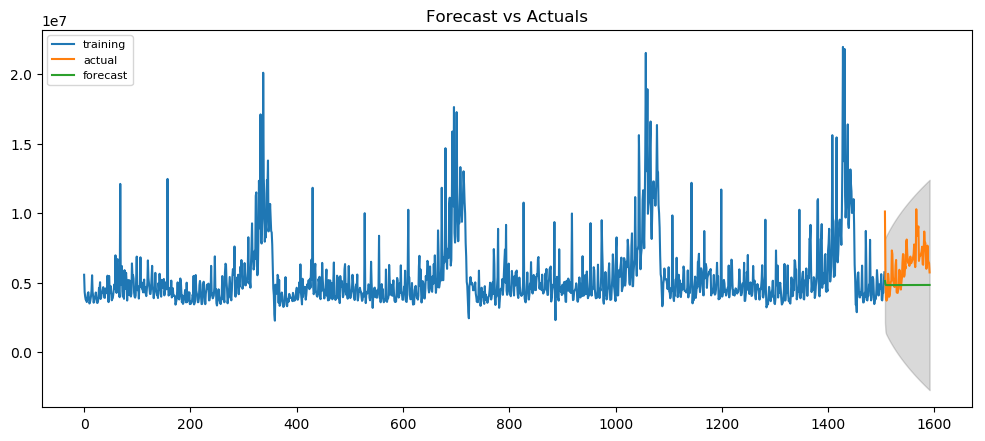

In [37]:
# Build Model
model = ARIMA(train, order=(1, 1, 2))  
fitted = model.fit(disp=-1)  
print(fitted.summary())

# Forecast
fc, se, conf = fitted.forecast(85, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc, index=test.index)
lower_series = pd.Series(conf[:, 0], index=test.index)
upper_series = pd.Series(conf[:, 1], index=test.index)

# Plot
plt.figure(figsize=(12,5), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.fill_between(lower_series.index, lower_series, upper_series, 
                 color='k', alpha=.15)
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [38]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc, test.values)


{'mape': 0.2389343751020712,
 'me': -1452578.8529975247,
 'mae': 1645922.3204665247,
 'mpe': -0.19129228049558014,
 'rmse': 2003209.2312900282,
 'acf1': 0.6714785438926917,
 'corr': 0.3400381695783541,
 'minmax': 0.23515214530697426}

In [ ]:
#Around 24% MAPE implies the model is about 76% accurate in predicting the next 85 observations.

In [39]:
from statsmodels.tsa.arima_model import ARIMA
import pmdarima as pm

ModuleNotFoundError: No module named 'pmdarima'

In [40]:
pip install pmdarima


The following command must be run outside of the IPython shell:

    $ pip install pmdarima

The Python package manager (pip) can only be used from outside of IPython.
Please reissue the `pip` command in a separate terminal or command prompt.

See the Python documentation for more information on how to install packages:

    https://docs.python.org/3/installing/
